In [46]:
import pandas as pd
import matplotlib.pyplot as plt

In [47]:
df = pd.read_csv('results/test/mattersim_results.csv')

In [48]:
df

,num_atoms,num_parts,avg_part_size,num_mp,energy_error_abs,energy_error_pct,forces_error_max,forces_error_mae,forces_error_mape,forces_error_ratio,forces_error_mse,forces_error_rms,benchmark_time,all_partition_time,avg_partition_time
0,426,20,423.95,2,0.000732,0.000033,4.341519e-02,1.685192e-04,0.070015,4.053445e-04,3.009186e-06,1.734701e-03,0.281121,1.157039,0.057852
1,426,20,426.00,3,0.000977,0.000044,8.344650e-07,1.179141e-07,0.000210,3.633708e-07,2.826807e-14,1.681311e-07,0.090268,1.041989,0.052099
2,426,20,426.00,4,0.000977,0.000044,7.748604e-07,1.238379e-07,0.000233,3.792232e-07,3.113724e-14,1.764575e-07,0.087497,1.029297,0.051465
3,426,20,426.00,5,0.000488,0.000022,7.575145e-07,1.177321e-07,0.000209,3.542866e-07,2.799243e-14,1.673094e-07,0.086175,1.070208,0.053510
4,426,20,426.00,6,0.000977,0.000044,8.642673e-07,1.185866e-07,0.000196,3.602855e-07,2.972757e-14,1.724168e-07,0.088724,1.032027,0.051601
5,426,20,426.00,7,0.000732,0.000033,8.344650e-07,1.184464e-07,0.000242,3.601140e-07,2.912713e-14,1.706667e-07,0.085018,1.044001,0.052200
6,426,20,426.00,8,0.000732,0.000033,8.344650e-07,1.177140e-07,0.000208,3.496452e-07,2.824885e-14,1.680739e-07,0.084481,1.032885,0.051644
7,1704,20,746.35,2,0.008789,0.000100,7.713938e-02,8.066709e-04,2.087226,2.704351e-03,7.264658e-06,2.695303e-03,0.182357,1.508053,0.075403
8,1704,20,1300.15,3,0.007812,0.000088,8.654594e-04,7.958508e-06,0.027563,2.592681e-05,1.054429e-09,3.247197e-05,0.196587,2.033868,0.101693
9,1704,20,1652.65,4,0.006836,0.000077,5.424023e-06,1.415458e-07,0.000302,4.265263e-07,5.600907e-14,2.366624e-07,0.177784,2.802270,0.140113


## Partitioning

In [49]:
df['avg_part_ratio'] = df['avg_part_size'] / df['num_atoms']
avg_by_mp = df.groupby('num_mp').mean()

Text(0, 0.5, 'Proportion of All Atoms')

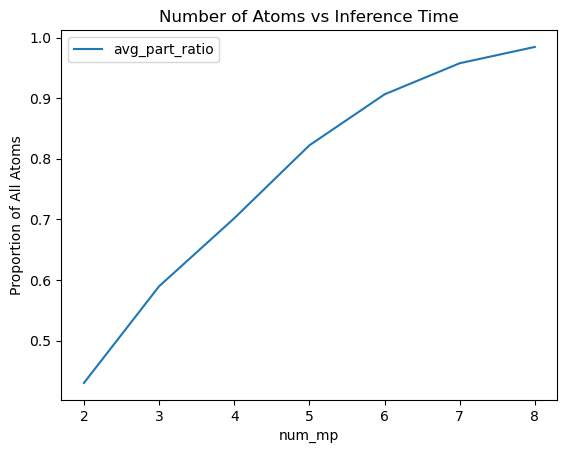

In [50]:
ax = avg_by_mp.plot(y=['avg_part_ratio'])
ax.set_title("Number of Atoms vs Inference Time")
ax.set_ylabel('Proportion of All Atoms')

## Timing

In [51]:
avg_by_num_atoms = df.groupby('num_atoms').mean()

Text(0, 0.5, 'Time (seconds)')

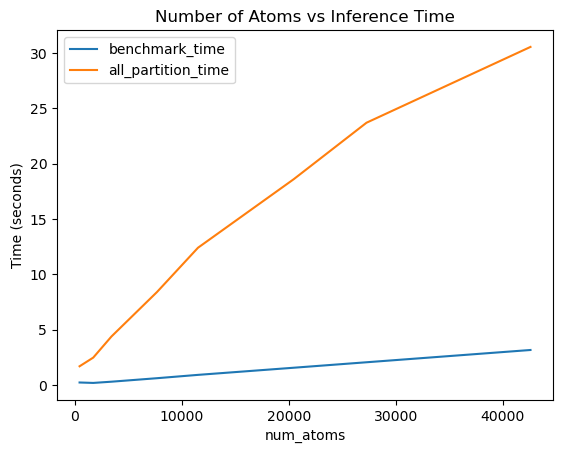

In [52]:
ax = avg_by_num_atoms.plot(y=['benchmark_time', 'all_partition_time'])
ax.set_title("Number of Atoms vs Inference Time")
ax.set_ylabel('Time (seconds)')

## Energy Error

In [53]:
avg_by_mp = df.groupby('num_mp').mean()

(0.0, 1.0)

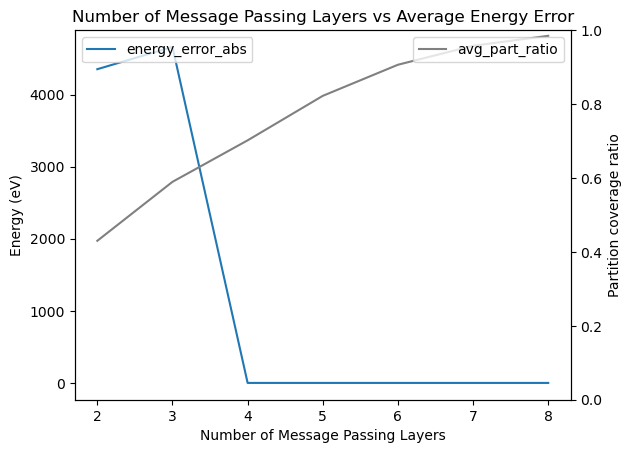

In [69]:
fig, ax1 = plt.subplots()

avg_by_mp.plot(
    y=['energy_error_abs'],
    ax=ax1
)

ax1.set_title("Number of Message Passing Layers vs Average Energy Error")
ax1.set_ylabel("Energy (eV)")
ax1.set_xlabel("Number of Message Passing Layers")
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

avg_by_mp['avg_part_ratio'].plot(ax=ax2, color='gray', )
ax2.set_ylabel("Partition coverage ratio")
ax2.legend(loc='upper right')
ax2.set_ylim([0, 1])


## Forces Error

(0.0, 1.0)

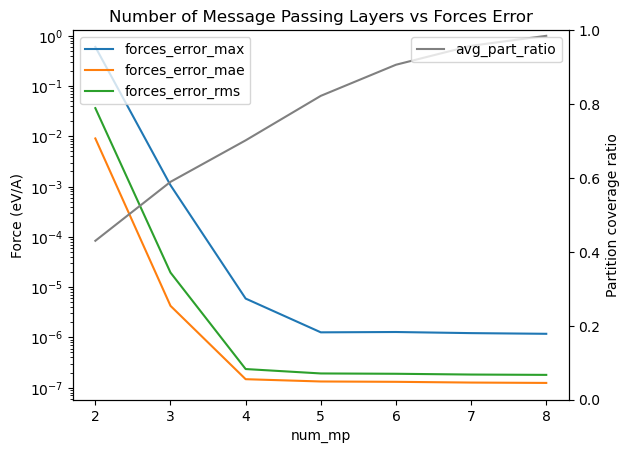

In [70]:
fig, ax1 = plt.subplots()

avg_by_mp[['forces_error_max', 'forces_error_mae', 'forces_error_rms']].plot(
    ax=ax1,
    logy=True
)
ax1.set_title("Number of Message Passing Layers vs Forces Error")
ax1.set_ylabel("Force (eV/A)")
ax1.legend(loc='upper left')

ax2 = ax1.twinx()

avg_by_mp['avg_part_ratio'].plot(ax=ax2, color='gray', )
ax2.set_ylabel("Partition coverage ratio")
ax2.legend(loc='upper right')
ax2.set_ylim([0, 1])


Text(0, 0.5, 'Force (eV/A)')

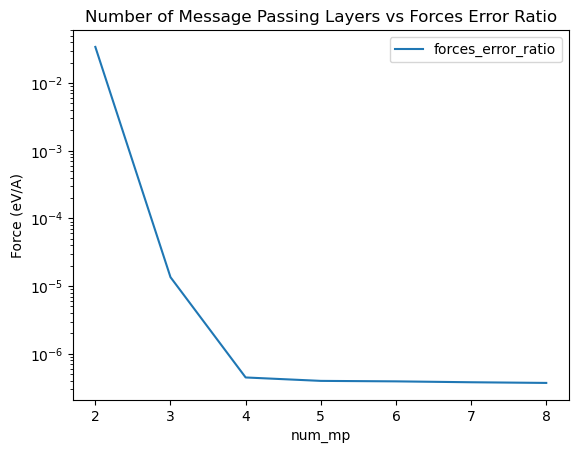

In [57]:
ax = avg_by_mp.plot(y=['forces_error_ratio'], logy=True)
ax.set_title("Number of Message Passing Layers vs Forces Error Ratio")
ax.set_ylabel("Force (eV/A)")